# Life Expectancy & GDP

## Structure
- 1. Introduction
- 2. Data Characteristics and Cleaning
- 3. Analysis
    - 3.1. What is the average life expectancy and GDP in each country?
    - 3.2. What is the distribution of life expectancy and GDP across these countries?
    - 3.3. How has life expectancy changed overtime in each country?
    - 3.4. How has GDP changed overtime in each country?
    - 3.5. What is the relationship between life expectancy and GDP in each country?
- 4. Conclusions

**Data sources:**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life Expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## 1. Introduction
The aim of this project is analyse data on life expectancy and GDP from the World Health Organisation and the World Bank in order to determine whether there is a strong relationship between the two variables. 

Below are the questions that this analysis will seek to answer:
- What is the average life expectancy and GDP in each country?
- What is the distribution of life expectancy and GDP across these countries?
- How has life expectancy changed overtime in each country?
- How has GDP changed overtime in each country?
- What is the relationship between life expectancy and GDP in each country?

## 2. Data Characteristics and Cleaning

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr

In order to conduct my analysis, I have loaded `all_data.csv` into the DataFrame called all_data and inspected the first few rows using .head(). The `all_data.csv` dataset has the following columns of data:
- Country
- Year
- Life expectancy at birth (years)
- GDP

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Next, I am using .info() to check the data types and to look for missing data. Furthermore, since my analysis concerns six countries over a particular time period, I have printed the list of countries and the time period for context.

Below are the amendmants I have made to the DataFrame:
- Upon inspecting the information table, I noticed that `Country` was stored as an object, so I have converted this to a string to make operations easier.
- I have renamed the `Life expectancy at birth (years)` column for easier coding, and I have made `Country` and `Year` lowercase.
- I have renamed the country `United States of America` to `USA` so that it takes up less space in visualisations.

In [7]:
print(all_data.info())
print(all_data.Country.unique())
print(all_data.Year.unique())

# Amending data type from 'object' to 'string'
all_data['Country'] = all_data['Country'].astype('string')

# Amending column names and renaming 'United States of America' to 'USA'
all_data.rename(columns = {'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy'}, inplace = True)
all_data['country'] = all_data['country'].replace('United States of America', 'USA')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## 3. Analysis

In this section I will use `all_data` in order to answer the questions I laid out in the introduction.

#### 3.1. What is the average life expectancy and GDP in each country?

Starting with `life_expectancy`, I wanted to find out what the average life expectancy at birth is in each of the six countries in the dataset. Below I have used a for loop to print the average life expectancy each country. 

In [9]:
average_life_expectancy = all_data.groupby('country').life_expectancy.mean()

# Using a for loop to print the average life expectancy for each country
for country, life_expectancy in average_life_expectancy.items():
    print(f"The average life expectancy at birth in {country} is {life_expectancy:.2f}")

The average life expectancy at birth in Chile is 78.94
The average life expectancy at birth in China is 74.26
The average life expectancy at birth in Germany is 79.66
The average life expectancy at birth in Mexico is 75.72
The average life expectancy at birth in USA is 78.06
The average life expectancy at birth in Zimbabwe is 50.09


The below bar chart shows the average `life_expectancy` by `country`.
- At 50.1 years, Zimbabwe has the lowest average life expectancy at birth. This is consderably smaller than the other countries.
- The other five countries have a very similar life expectancy, but Germany has the highest at 79.7 years.

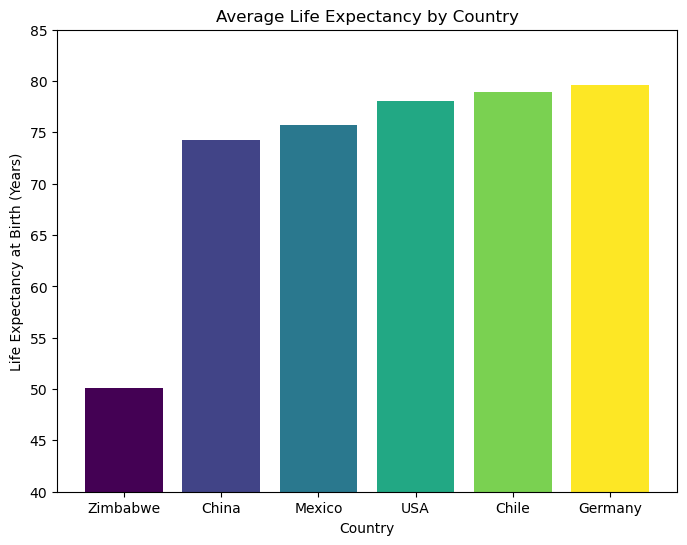

<Figure size 640x480 with 0 Axes>

In [11]:
# Sorting the data so that the bar chart is ordered from lowest to highest
average_life_expectancy = average_life_expectancy.sort_values()

plt.figure(figsize = (8,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_life_expectancy)))
plt.bar(average_life_expectancy.index, average_life_expectancy.values, color = colors)
plt.title('Average Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.ylim(40, 85)
plt.show()
plt.clf()

Furthermore, I wanted to explore the change to life expectancy throughout the range of the dataset.

The below graph shows the change in `life_expectancy` between the years 2000 and 2015 for each `country`.
- Zimbabwe's life expectancy has increased by more than 14 years over the 10 year period - a substantial increase relative to the other five countries.
- The smallest increase in life expectancy was in Mexico, where life expectancy at birth increase by 1.9 years between 2000 and 2015.

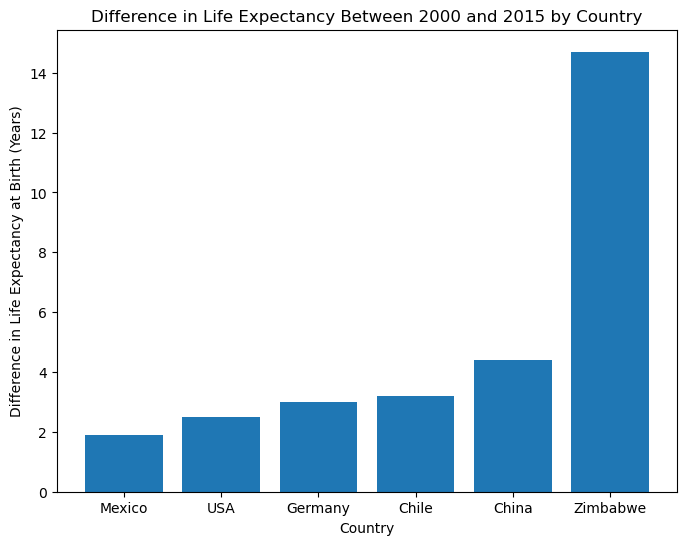

<Figure size 640x480 with 0 Axes>

In [13]:
# Creating DataFrames for 2000 and 2015
all_data_2000 = all_data[all_data.year == 2000]
all_data_2015 = all_data[all_data.year == 2015]

# Intiailising lists for results from the for loop
countries = []
differences = []

# Loops through data an extracts life expectancy from 2000 and 2015 for each country in order to calculate the difference
for index, row in all_data_2000.iterrows():
    country = row['country']
    life_expectancy_2000 = row['life_expectancy']
    life_expectancy_2015 = all_data_2015[all_data_2015['country'] == country]['life_expectancy'].values[0]
    difference = life_expectancy_2015 - life_expectancy_2000
    countries.append(country)
    differences.append(difference)

# Creates DataFrame that stores the differences in life expectancy
df_diff = pd.DataFrame({'Country': countries, 'Difference': differences})

df_diff_sorted = df_diff.sort_values(by='Difference', ascending=True)

# Plots the differences on a bar chart
plt.figure(figsize = (8,6))
plt.bar(df_diff_sorted['Country'], df_diff_sorted['Difference'])
plt.title('Difference in Life Expectancy Between 2000 and 2015 by Country')
plt.xlabel('Country')
plt.ylabel('Difference in Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

Now looking at `GDP`, I have used a for loop to calculate and print the average GDP in billions of USD for each country.

In [15]:
#Calculating the average GDP (in trillions) for each country

average_GDP = all_data.groupby('country').GDP.mean()/1e12

for country, GDP in average_GDP.items():
    print(f"The average GDP in {country} is ${GDP:,.2f} trillion")

The average GDP in Chile is $0.17 trillion
The average GDP in China is $4.96 trillion
The average GDP in Germany is $3.09 trillion
The average GDP in Mexico is $0.98 trillion
The average GDP in USA is $14.07 trillion
The average GDP in Zimbabwe is $0.01 trillion


The below bar chart shows the average `GDP` by `country`.
- With a value of \$9.06 billion, Zimbabwe has the lowest average GDP.
- Unlike what I observed with life expectancy, Zimbabwe does not appear to be a significant outlier, since there is more of a staggered difference in GDP across all countries. 
- The USA has the greatest GDP at \$14.07 trillion - more than 155 times that of Zimbabwe, and more than 2.8 times that of China, which has the second largest GDP out of all six countries.

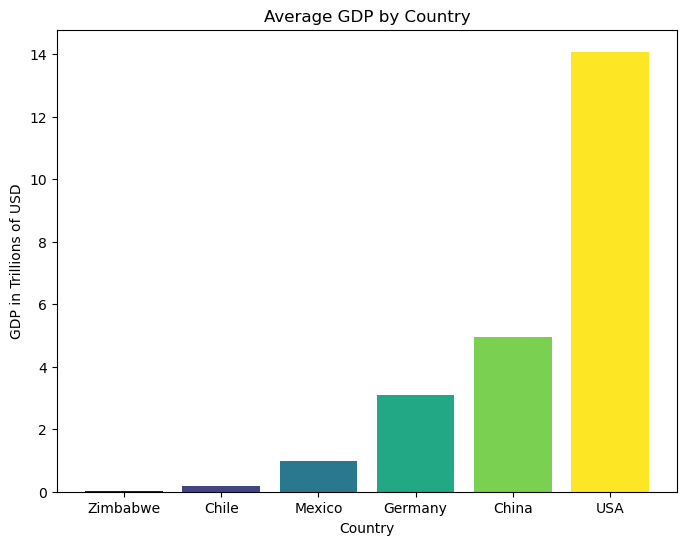

<Figure size 640x480 with 0 Axes>

In [17]:
# Sorting the data so that the bar chart is ordered from lowest to highest
average_GDP = average_GDP.sort_values()

plt.figure(figsize = (8,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_GDP)))
plt.bar(average_GDP.index, average_GDP.values, color = colors)
plt.title('Average GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of USD')
plt.show()
plt.clf()

The below graph shows the difference in `GDP` between the years 2000 and 2015 for each `country`.
- With an increase of \$9.61 billion, Zimbabwe experienced the smallest change in GDP.
- The greatest change in GDP was seen in China, where the country's GDP grew by \$9.85 trillion over the 15 year period. This is more than 1000 times that of the increase observed in Zimbabwe. 

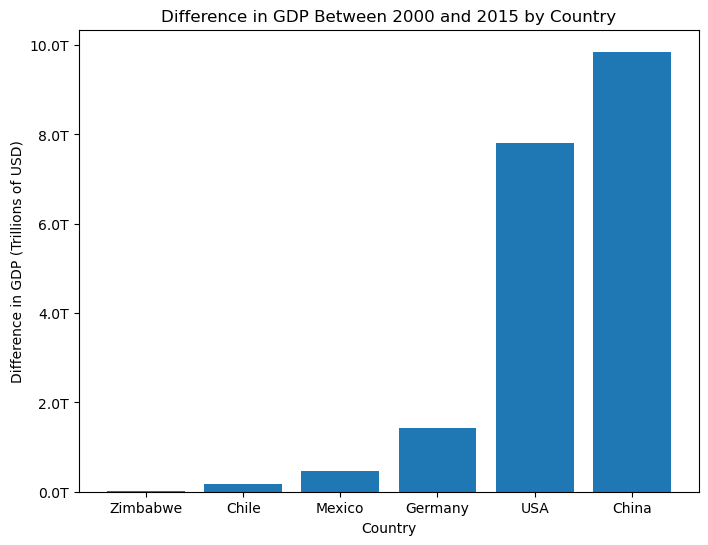

<Figure size 640x480 with 0 Axes>

In [129]:
all_data_2000 = all_data[all_data.year == 2000]
all_data_2015 = all_data[all_data.year == 2015]

countries = []
differences = []

for index, row in all_data_2000.iterrows():
    country = row['country']
    life_expectancy_2000 = row['GDP']
    life_expectancy_2015 = all_data_2015[all_data_2015['country'] == country]['GDP'].values[0]
    difference = life_expectancy_2015 - life_expectancy_2000
    countries.append(country)
    differences.append(difference)

df_diff = pd.DataFrame({'Country': countries, 'Difference': differences})

df_diff_sorted = df_diff.sort_values(by='Difference', ascending=True)

plt.figure(figsize=(8,6))
plt.bar(df_diff_sorted['Country'], df_diff_sorted['Difference'])

plt.title('Difference in GDP Between 2000 and 2015 by Country')
plt.xlabel('Country')
plt.ylabel('Difference in GDP (Trillions of USD)')

# Set y-axis to trillions of USD
def trillions(x, pos):
    return f'{x*1e-12:.1f}T'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(trillions))

plt.show()
plt.clf()

#### 3.2. What is the distribution of life expectancy and GDP across these countries?

The below histogram indicates that the distribution of `life_expectancy` is heavily skewed to the left, since most of the data is on the right of the plot. As we already know, Zimbabwe is an outlier in this data, with more than 23 years between itself and the next highest  life expectancy (China). Therefore, it is possible that a different distribution would be observed if Zimbabwe was not included in the dataset.

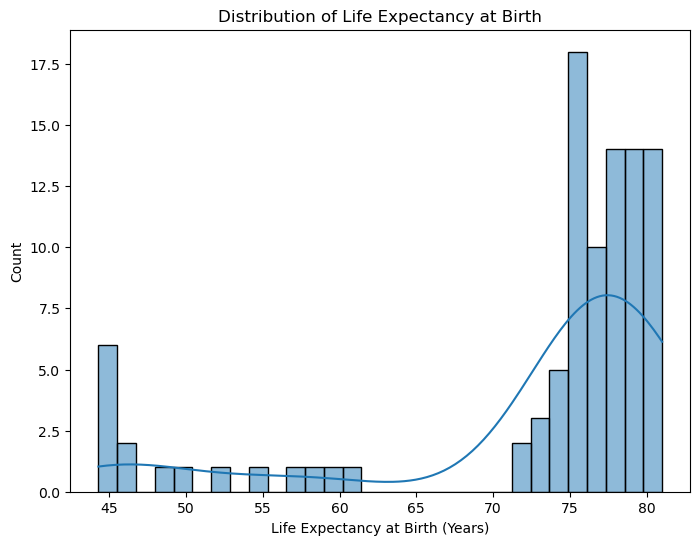

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize = (8,6))
sns.histplot(all_data.life_expectancy, kde=True, bins = 30)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel("Life Expectancy at Birth (Years)")
plt.show()
plt.clf()

For exploratory purposes, I have dropped Zimbabwe from the dataset to explore the distribution of life expectancy in the other countries. Zimbabwe is excluded from the DataFrame `all_data_2`. When comparing the below histogram to the one produced using `all_data`, the left tail has disappeared and the distribution is much more symmetric, highlighting how Zimbabwe was an outlier. 

I will now return to using `all_data` in my analysis.

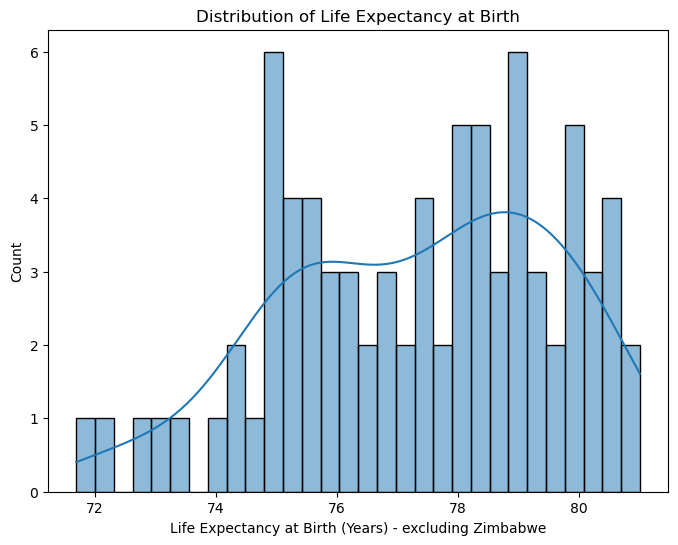

<Figure size 640x480 with 0 Axes>

In [47]:
# Dropping Zimbabwe from the dataset
all_data_2 = all_data[all_data['country'] != 'Zimbabwe']

plt.figure(figsize = (8,6))
sns.histplot(all_data_2.life_expectancy, kde=True, bins = 30)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel("Life Expectancy at Birth (Years) - excluding Zimbabwe")
plt.show()
plt.clf()

The below histogram shows that the distribution of `GDP` is heavily skewed to the right, with the majority of the data falling in the `$0` to `$0.6` trillion bucket. Chile, Mexico, and Germny experienced modest growth, which is demonstrated by the clsutering between `$0.6` trillion and `$4.2` trillion. Both China and USA  experienced significant growth between 2000 and 2015, explaining the long tail at the higher end of the x-axis.

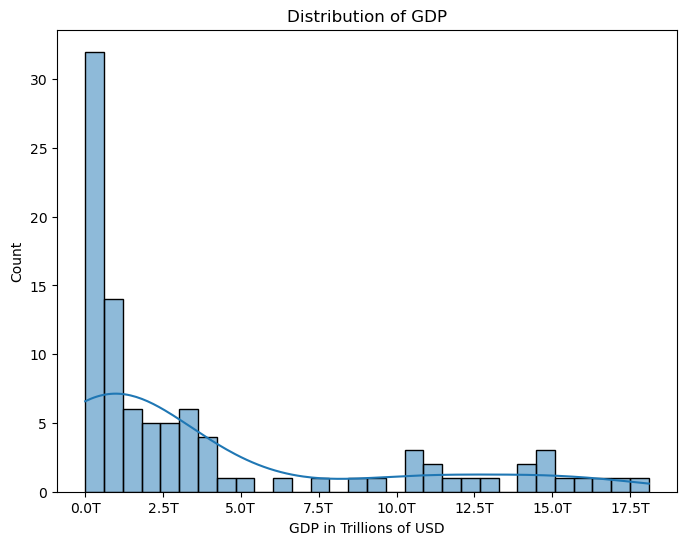

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize = (8,6))
sns.histplot(all_data.GDP, kde=True, bins = 30)
plt.title('Distribution of GDP')
plt.xlabel("GDP in Trillions of USD")

# Set x-axis to trillions of USD
def trillions(x, pos):
    return f'{x*1e-12:.1f}T'    
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(trillions))

plt.show()
plt.clf()

#### 3.3. How has life expectancy changed overtime in each country?

The below line plot demostrates the growth in `life_expectancy` for each `country` overtime.
- Zimbabwe's life expectancy is much lower than that of the other countries, so it appears at the bottom of the plot. There is a slight decline between 2000 and 2004, followed by a notable increase from 2004 onwards. This growth rate is the fastest among all the countries in the dataset.
- For the other five countries, life expectancy shows a consistent upward trend over time. Some minor dips are observed, for example in Chile and Mexico, which will be explored in the following plots.

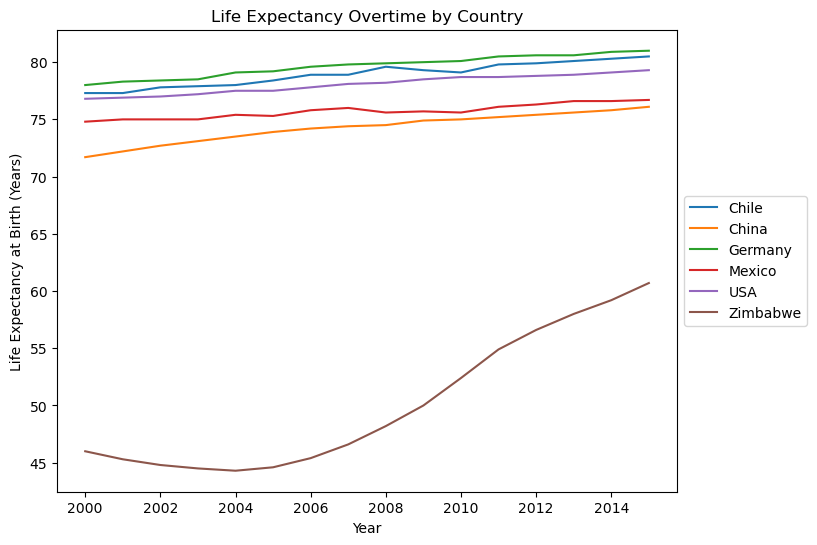

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = all_data.year, y = all_data.life_expectancy, hue = all_data.country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.title('Life Expectancy Overtime by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

The plots below provide a more detailed view of how `life_expectancy` has changed over time in each `country`.
- Chile and Mexico both experienced a decline in life expectancy between 2007 and 2010. Given their geographical proximity, a common underlying factor may explain this trend.
- China, Germany, and the USA show a similar upward trajectory in life expectancy. While there are brief periods of stagnation during the 10 year period, overall growth is steady and consistent.
- Zimbabwe’s life expectancy trend is unique compared to the other countries. It shows a decline from 2000 to 2004, followed by a clear and sustained increase from 2004 onwards.

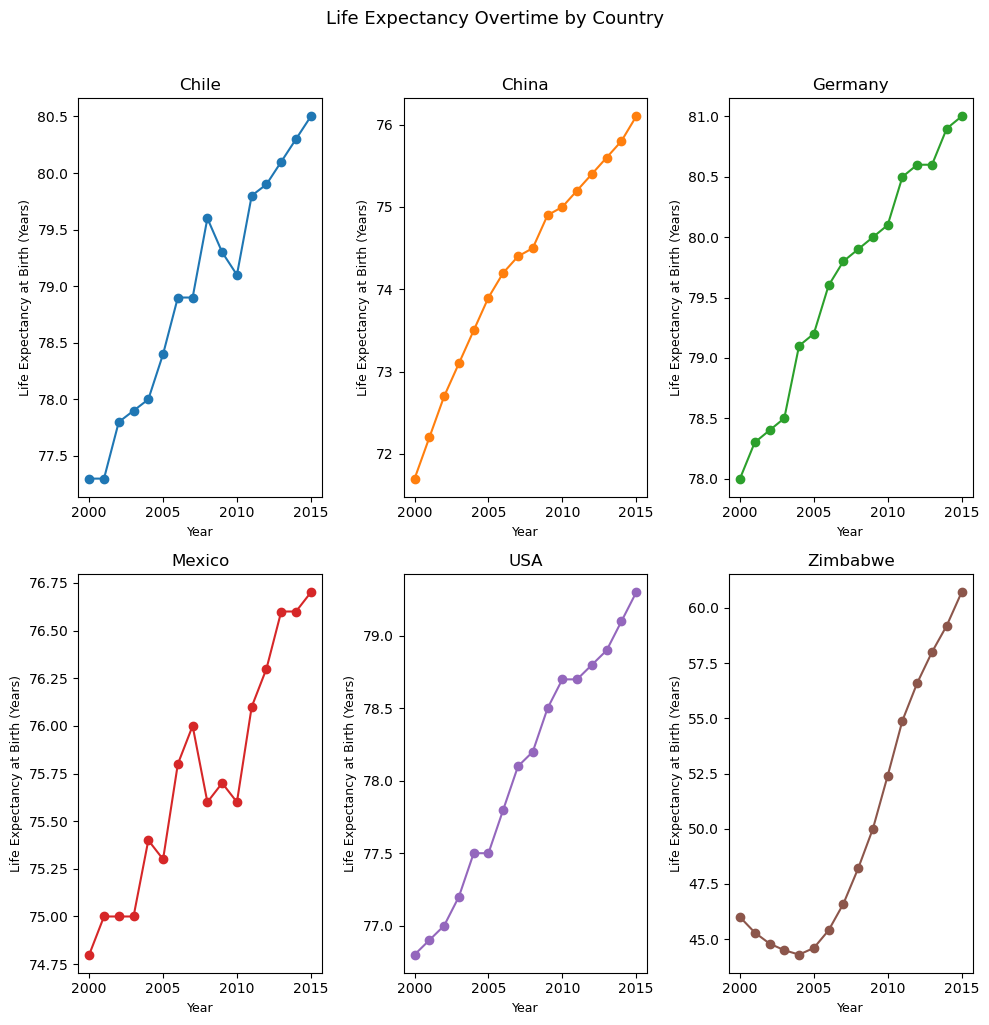

In [53]:
countries = all_data.country.unique()

# Determine the number of columns and rows (based on the number of countries)
num_columns = 3
num_rows = (len(countries) + num_columns - 1) // num_columns

# Creating subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5 * num_rows))
fig.suptitle("Life Expectancy Overtime by Country", fontsize=13, y=1.02)
color_cycle = plt.cm.tab10.colors

# Flatten the axes array for easy indexing if there are multiple rows and columns
axes = axes.flatten()

# Loop through each country and plot on the corresponding axis
for i, country in enumerate(countries):
    country_data = all_data[all_data['country'] == country]
    color = color_cycle[i % len(color_cycle)]
    axes[i].plot(country_data.year, country_data.life_expectancy, label=country, marker='o', color = color)
    axes[i].set_title(f"{country}")
    axes[i].set_xlabel('Year', fontsize = 9)
    axes[i].set_ylabel('Life Expectancy at Birth (Years)', fontsize = 9)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

#### 3.4. How has GDP changed overtime in each country?

Now looking at `GDP`, the below line plot shows the change in `GDP` overtime for each `country`.
- Overall, GDP in each country shows a mostly positive trend between 2000 and 2015.
- The USA stands out, as its GDP was significantly higher than that of the other countries in 2000. Growth is sustained throughout the period, except for a dip in 2008–2009, likely due to the Global Financial Crisis.
- China, which began the period with the third-largest GDP, overtakes Germany around 2006–2007 and experiences rapid growth, following a steep upward trajectory similar to that of the USA.
- GDP growth in Mexico, Chile, and Zimbabwe is relatively flat compared to the others, with minimal change over the 15-year period.
- The variation in GDP trends across countries suggests that the nations in the dataset were at different stages of economic development and industrialisation during this time.

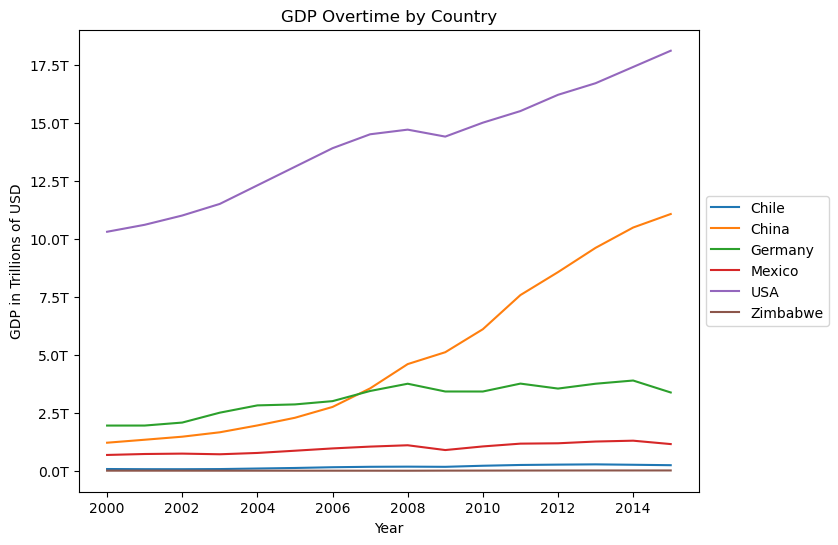

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = all_data.year, y = all_data.GDP, hue = all_data.country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.title('GDP Overtime by Country')
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of USD')

# Set y-axis to trillions of USD
def trillions(x, pos):
    return f'{x*1e-12:.1f}T'    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(trillions))

plt.show()
plt.clf()

Like with the previous analysis, the below plots provide a more detailed view of how `GDP` has changed over time in each `country`. Please note that the scale of each plot differs depending on the data observed in each country.

- China and the USA both exhibit strong, sustained GDP growth. As pointed out in the previous plot, the USA shows a brief dip in 2008–2009, likely due to the Global Financial Crisis, but quickly recovers and continues its upward trajectory.
- Germany follows a similar growth pattern to China and the USA between 2000 and 2008. However, from 2008 onward, its GDP shows periods of fluctuation, ending with a noticeable decline between 2014 and 2015.
- Zimbabwe's GDP steadily declines between 2000 and 2008, before experiencing a sharp increase in 2009. This upward trend continues over the following years.
- Chile and Mexico see steady GDP growth from 2003 to 2008, followed by a brief decline, which is more pronounced in Mexico. Both countries resume growth by 2010, though GDP begins to fall again as 2015 approaches.

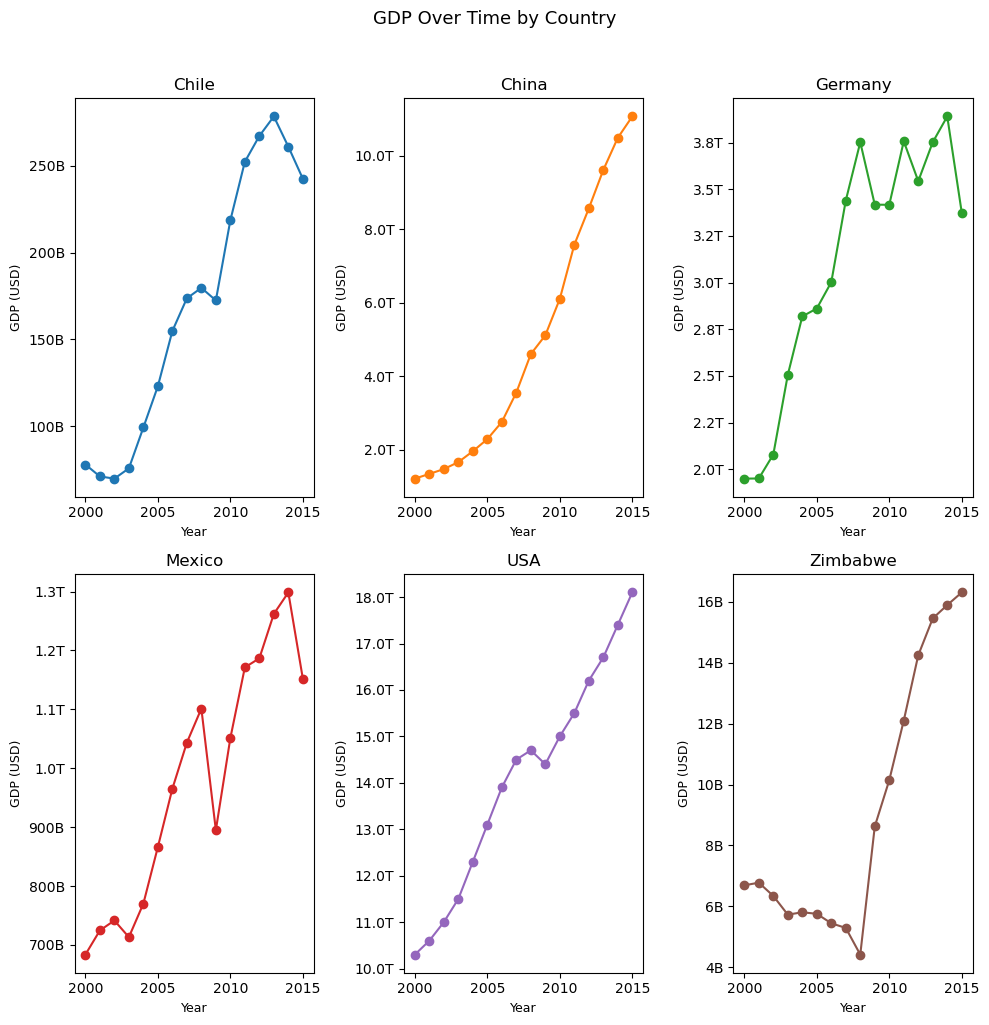

In [131]:
# Dynamic formatter for billions/trillions - helps with scaling 
def dynamic_billions_trillions(x, pos):
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.0f}B'
    else:
        return f'{x:.0f}'

countries = all_data.country.unique()

# Determine the number of columns and rows (based on the number of countries)
num_columns = 3
num_rows = (len(countries) + num_columns - 1) // num_columns

# Creating subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5 * num_rows))
fig.suptitle("GDP Over Time by Country", fontsize=13, y=1.02)
color_cycle = plt.cm.tab10.colors

# Flatten the axes array for easy indexing if there are multiple rows and columns
axes = axes.flatten()

# Loop through each country and plot on the corresponding axis
for i, country in enumerate(countries):
    country_data = all_data[all_data['country'] == country]
    color = color_cycle[i % len(color_cycle)]
    
    axes[i].plot(country_data.year, country_data.GDP, label=country, marker='o', color=color)
    axes[i].set_title(f"{country}")
    axes[i].set_xlabel('Year', fontsize=9)
    axes[i].set_ylabel('GDP (USD)', fontsize=9)
    
    # Apply dynamic formatter to y-axis
    axes[i].yaxis.set_major_formatter(FuncFormatter(dynamic_billions_trillions))

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

#### 3.5. What is the relationship between life expectancy and GDP in each country?

The below scatter plot explores the relationship between `life_expectancy` and `GDP`.
- Zimbabwe shows increasing life expectancy over time, but its GDP remains relatively flat, indicating limited economic growth despite improvements to life expectancy.
- In contrast, the other countries in the dataset tend to show a positive relationship between life expectancy and GDP. This trend is more subtle in Chile and Mexico, but more pronounced in Germany, China, and the USA.
- Interestingly, the USA and China display a very similar relationship between life expectancy and GDP. Visually, the USA's data points appear to be a continuation of the trend established by China, suggesting comparable growth patterns over time

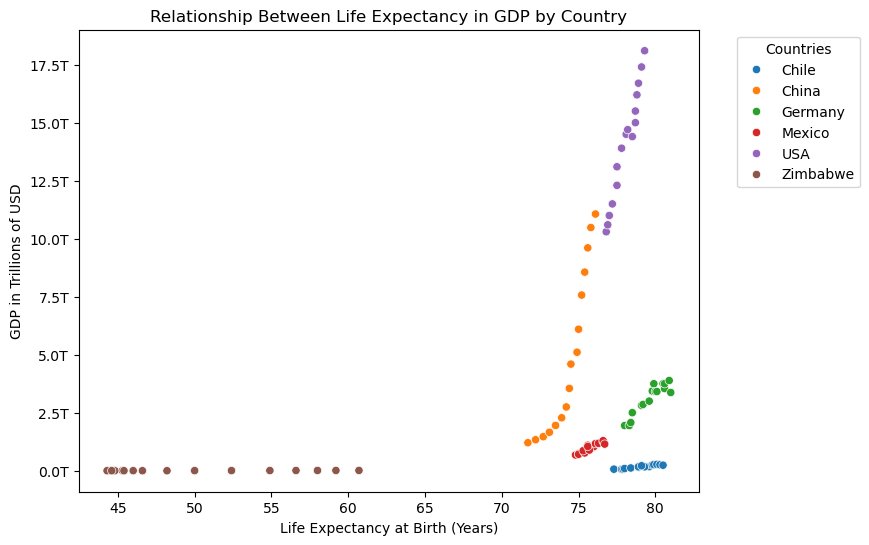

<Figure size 640x480 with 0 Axes>

In [220]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = all_data.life_expectancy, y = all_data.GDP, hue = all_data.country)
plt.title('Relationship Between Life Expectancy in GDP by Country')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('GDP in Trillions of USD')
plt.legend(title = 'Countries', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis to trillions of USD
def trillions(x, pos):
    return f'{x*1e-12:.1f}T'    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(trillions))
plt.show()
plt.clf()

As with the previous plots, the countries have been broken out into individual subplots to provide a closer look at the relationship between `life_expectancy` and `GDP`. I have calculated the Pearson correlation coefficient for each country to understand the strength of this relationship. Please note that the scale of each plot varies according to the data range observed in each country.

- All six countries exhibit a strong linear relationship between life expectancy and GDP, with the strongest correlation observed in the USA (r = 0.98).
- China’s plot shows an almost exponential curve, indicating that increases in GDP have diminishing returns on life expectancy - a non-linear relationship I explore in more detail later.
- It is interesting to observe that, in Zimbabwe, the relationship appears negative when GDP is below $6 billion. From previous analysis, we know that there was a period of decline for both variables, and life expectancy began to increase before GDP did, which could explain this shape.

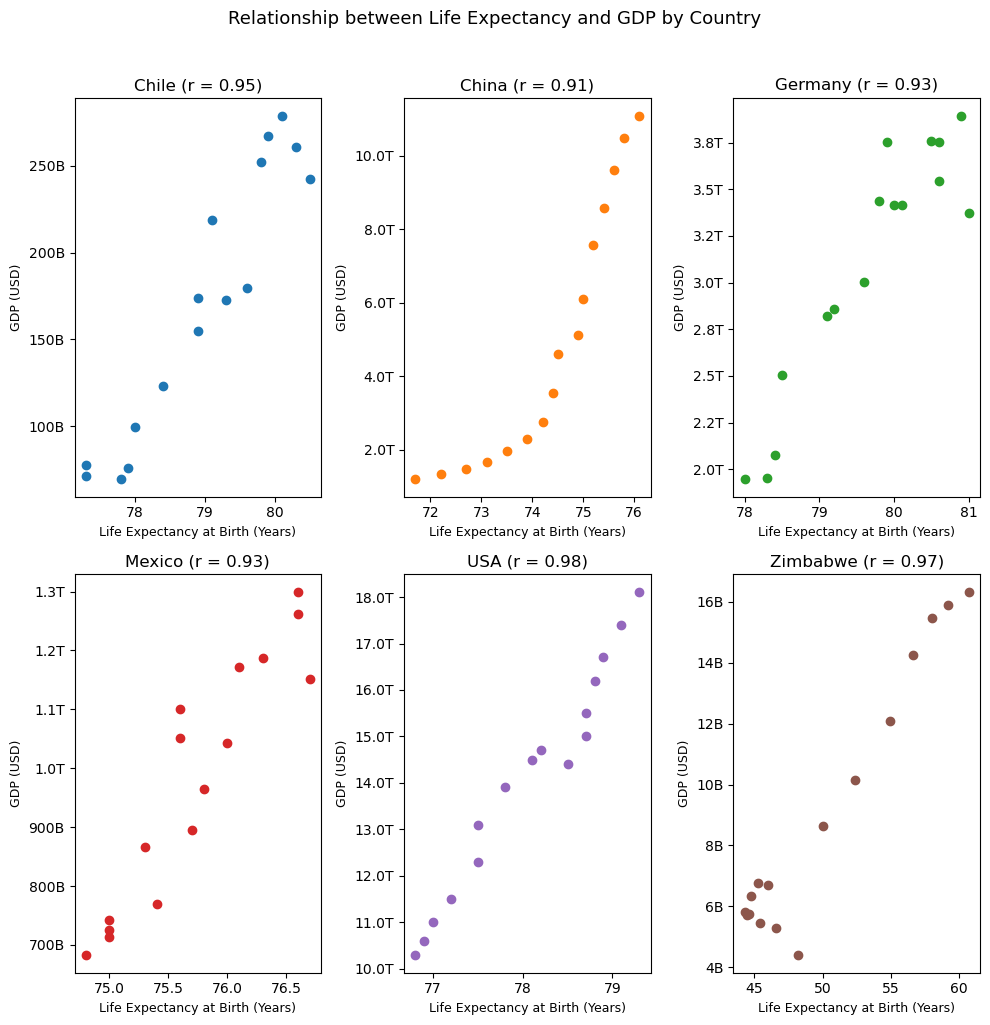

In [73]:
# Dynamic formatter for billions/trillions - helps with scaling 
def dynamic_billions_trillions(x, pos):
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.0f}B'
    else:
        return f'{x:.0f}'

countries = all_data.country.unique()

# Determine the number of columns (e.g., 2 columns) and rows (based on the number of countries)
num_columns = 3
num_rows = (len(countries) + num_columns - 1) // num_columns  # Round up for the number of rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5 * num_rows))
fig.suptitle("Relationship between Life Expectancy and GDP by Country", fontsize=13, y=1.02)
color_cycle = plt.cm.tab10.colors

# Flatten the axes array for easy indexing if there are multiple rows and columns
axes = axes.flatten()

# Loop through each country and plot on the corresponding axis
for i, country in enumerate(countries):
    country_data = all_data[all_data['country'] == country]
    color = color_cycle[i % len(color_cycle)]
    correlation, p = pearsonr(country_data.life_expectancy, country_data.GDP)
    axes[i].scatter(country_data.life_expectancy, country_data.GDP, label=country, marker='o', color = color)
    axes[i].set_title(f"{country} (r = {correlation:.2f})")
    axes[i].set_xlabel('Life Expectancy at Birth (Years)', fontsize = 9)
    axes[i].set_ylabel('GDP (USD)', fontsize = 9)
   
    # Apply dynamic formatter to y-axis
    axes[i].yaxis.set_major_formatter(FuncFormatter(dynamic_billions_trillions))

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Since the relationship between `life_expectancy` and `GDP` in China appears non-linear, I created a subplot using `log(GDP)` and recalculated the correlation coefficient. Below, you can see the original and log-transformed plots side by side.
- After applying the log transformation to GDP, China’s exponential curve straightens into a linear trend, making the data more appropriate for Pearson correlation analysis.
- The correlation coefficient increases to 0.97, indicating an even stronger linear relationship and suggesting that log(GDP) is a better predictor of life expectancy.

Correlation coefficient for China: 0.91
Correlation coefficient for China (log GDP): 0.97


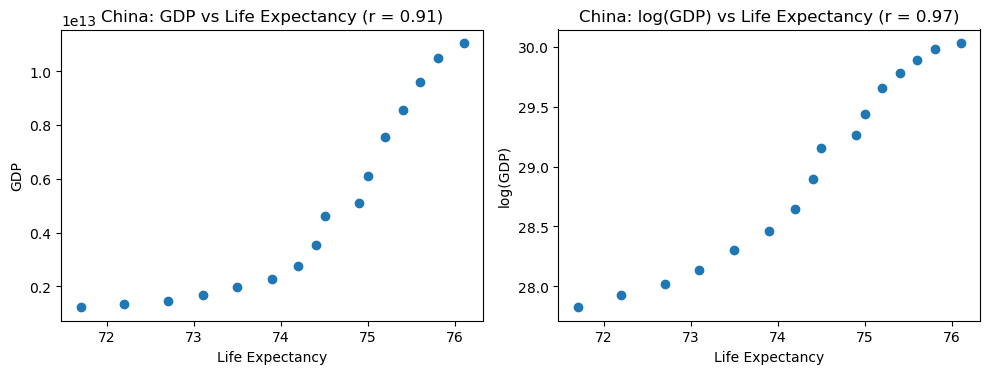

<Figure size 640x480 with 0 Axes>

In [125]:
# Creating a subset with China's data
subset = all_data[all_data['country'] == 'China']
correlation, p = pearsonr(subset['life_expectancy'], subset['GDP'])
print(f"Correlation coefficient for China: {correlation:.2f}")

# Calculating the correlation coefficient using log(GDP)
subset = all_data[all_data['country'] == 'China'].copy()
subset['log_GDP'] = np.log(subset['GDP'])
correlation_log, p = pearsonr(subset['life_expectancy'], subset['log_GDP'])
print(f"Correlation coefficient for China (log GDP): {correlation_log:.2f}")

# Original scale
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(subset['life_expectancy'], subset['GDP'])
plt.title('China: GDP vs Life Expectancy (r = 0.91)')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# Log scale
plt.subplot(1, 2, 2)
plt.scatter(subset['life_expectancy'], subset['log_GDP'])
plt.title('China: log(GDP) vs Life Expectancy (r = 0.97)')
plt.xlabel('Life Expectancy')
plt.ylabel('log(GDP)')

plt.tight_layout()
plt.show()
plt.clf()

## 4. Conclusions

This analysis explored the relationship between life expectancy and GDP across six countries using data from the World Bank and World Health Organisation. 

Across the countries analysed, life expectancy was generally higher in more developed nations. Zimbabwe, classified by the World Bank as a lower-middle-income country, had a significantly lower life expectancy compared to the others. In terms of GDP, the disparities were even more pronounced, with Zimbabwe, Chile, and Mexico reporting substantially lower average GDPs relative to the more developed economies of Germany, China, and the USA.

At first glance, the distribution of life expectancy appeared heavily left-skewed due to Zimbabwe’s notably lower values. However, once Zimbabwe was excluded, the distribution became relatively normal with a small spread. In contrast, GDP showed a strong right skew, primarily driven by the significantly higher values in the USA and China, highlighting the wide economic disparities within this small sample of countries.

Life expectancy generally increased steadily across all countries, with Zimbabwe showing a particularly sharp rise between 2000 and 2015, likely reflecting significant improvements in healthcare. Chile and Mexico experienced a slight decline between 2007 and 2010, possibly due to regional or global factors, but both returned to an upward trend afterward.

GDP also rose steadily over time in most countries, with the most substantial gains observed in China and the USA. Notably, China did not experience any GDP decline between 2000 and 2015, suggesting a resilient economy capable of withstanding global shocks such as the 2008 Global Financial Crisis.

Across all six countries, a positive correlation was observed between GDP and life expectancy, suggesting that wealthier nations generally have populations live longer. However, this relationship was not strictly linear, indicating that other factors, such as healthcare systems, infrastructure, and social policies, also play a role in influencing life expectancy.

In summary, the analysis reinforces the commonly observed link between economic growth and improved life expectancy. Nonetheless, many socio-economic variables that affect life expectancy were beyond the scope of this study. Future analysis could incorporate additional indicators such as healthcare quality, education levels, infant mortality rates, and access to clean water. It would also be valuable to analyse countries by development level to uncover patterns specific to certain stages of economic and social progress.